In [4]:
from torchvision import models
from matplotlib import pyplot as plt

import numpy as np

import torch

import torch.nn as nn

import torch.nn.functional as F

import torch.optim as optim

torch.set_printoptions(edgeitems=2)

torch.manual_seed(123)

In [5]:
dir(models)

['AlexNet',
 'AlexNet_Weights',
 'ConvNeXt',
 'ConvNeXt_Base_Weights',
 'ConvNeXt_Large_Weights',
 'ConvNeXt_Small_Weights',
 'ConvNeXt_Tiny_Weights',
 'DenseNet',
 'DenseNet121_Weights',
 'DenseNet161_Weights',
 'DenseNet169_Weights',
 'DenseNet201_Weights',
 'EfficientNet',
 'EfficientNet_B0_Weights',
 'EfficientNet_B1_Weights',
 'EfficientNet_B2_Weights',
 'EfficientNet_B3_Weights',
 'EfficientNet_B4_Weights',
 'EfficientNet_B5_Weights',
 'EfficientNet_B6_Weights',
 'EfficientNet_B7_Weights',
 'EfficientNet_V2_L_Weights',
 'EfficientNet_V2_M_Weights',
 'EfficientNet_V2_S_Weights',
 'GoogLeNet',
 'GoogLeNetOutputs',
 'GoogLeNet_Weights',
 'Inception3',
 'InceptionOutputs',
 'Inception_V3_Weights',
 'MNASNet',
 'MNASNet0_5_Weights',
 'MNASNet0_75_Weights',
 'MNASNet1_0_Weights',
 'MNASNet1_3_Weights',
 'MaxVit',
 'MaxVit_T_Weights',
 'MobileNetV2',
 'MobileNetV3',
 'MobileNet_V2_Weights',
 'MobileNet_V3_Large_Weights',
 'MobileNet_V3_Small_Weights',
 'RegNet',
 'RegNet_X_16GF_Weights'

In [6]:
resnet = models.resnet101(pretrained=True)
resnet

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [8]:
from torchvision import transforms

preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )])

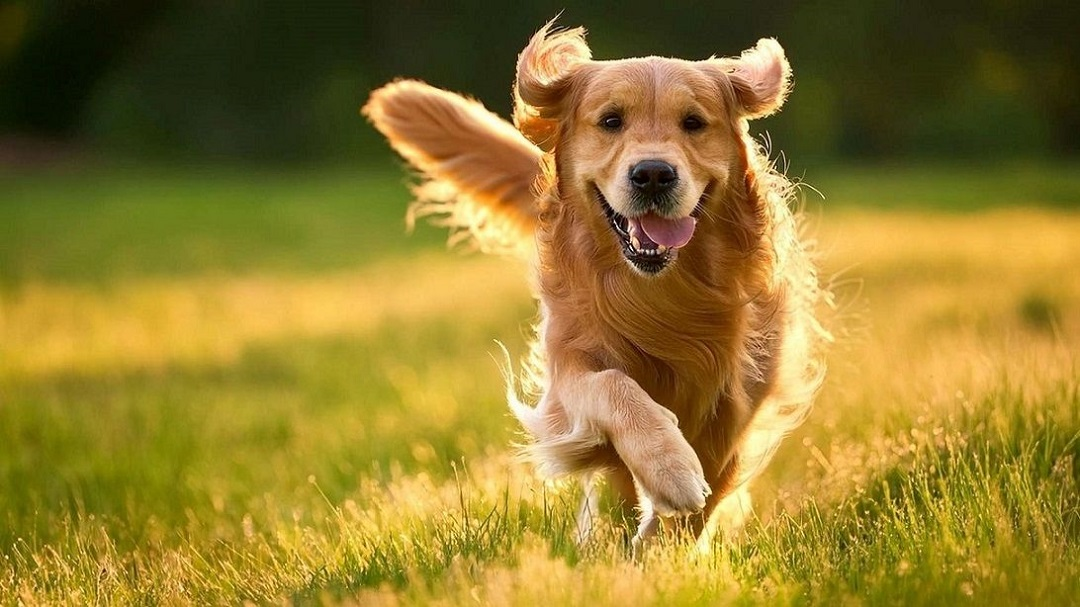

In [15]:
from PIL import Image

img = Image.open("data/sobaka.jpg")
img

In [16]:
img_t = preprocess(img)

In [19]:
batch_t = torch.unsqueeze(img_t, 0)

In [20]:
resnet.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [21]:
out = resnet(batch_t)
out

tensor([[-2.1086e+00, -9.9621e-01, -2.0234e+00, -3.4556e+00, -3.2423e+00,
         -2.6257e+00, -3.7299e+00, -1.6763e+00, -1.1168e-01, -1.9966e+00,
         -3.2328e-01,  1.4271e+00, -1.2305e+00, -1.2749e+00, -8.6119e-01,
         -3.8438e-01, -7.3740e-01,  5.0827e-01,  4.4609e-02,  5.1075e-02,
         -9.3755e-01, -4.7054e-01, -8.9366e-01,  1.2782e+00,  5.1327e-01,
          1.8939e-01, -8.5972e-01, -1.2539e+00, -7.1499e-01, -1.5283e-01,
          1.3411e-01, -9.1936e-01, -4.9792e-01, -2.0254e+00, -1.9149e+00,
         -2.5543e+00, -1.2742e+00, -2.2420e+00, -6.2992e-01, -6.5945e-01,
          9.2087e-01, -9.3469e-01, -3.6019e-01, -1.0417e+00, -1.1664e+00,
         -2.5531e+00,  8.9965e-01,  3.2674e-01, -2.4005e+00, -1.9348e+00,
         -1.4042e+00, -1.9296e+00, -5.0044e-01, -1.7752e+00, -1.2470e+00,
         -5.7389e-01, -1.7693e+00, -2.0996e+00, -1.6375e+00, -3.8486e-01,
         -3.2122e-01, -2.0277e+00, -6.0446e-02, -1.0093e+00, -1.5264e+00,
         -2.8766e+00, -2.2366e+00, -1.

In [23]:
with open('data/imagenet_classes.txt') as f:
    labels = [line.strip() for line in f.readlines()]

In [25]:
_, index = torch.max(out,1)

In [28]:
percentage = torch.nn.functional.softmax(out,dim=1)[0]*100
labels[index[0]],percentage[index[0]].item()

('golden retriever', 98.62312316894531)

In [29]:
_, indices = torch.sort(out, descending=True)
[(labels[idx], percentage[idx].item()) for idx in indices[0][:5]]

[('golden retriever', 98.62312316894531),
 ('tennis ball', 0.7804893851280212),
 ('cocker spaniel, English cocker spaniel, cocker', 0.10536415874958038),
 ('Brittany spaniel', 0.08238348364830017),
 ('Irish setter, red setter', 0.07637129724025726)]